**Importing Libraries**: The script begins by importing necessary libraries such as `pandas`, `matplotlib.pyplot`, `numpy`, `random`, `f_oneway` from `scipy.stats`, and specific components from `sklearn` for model selection, logistic regression, and metrics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

**Data Generation Function**: The `generate_random_data` function takes the number of records `n` and a list of `categories` as input to create a DataFrame with random data for Date, Category, and Likes. It returns the generated DataFrame.

In [2]:
def generate_random_data(n, categories):
    """
    Generate random data for the given number of records and categories.

    Args:
    n (int): Number of records to generate.
    categories (list): List of categories.

    Returns:
    pandas.DataFrame: Generated random data.
    """
    if not isinstance(n, int) or n <= 0:
        raise ValueError("n must be a positive integer")

    # Create random data with Date, Category, and Likes
    data = {
        'Date': pd.date_range('2023-01-01', periods=n),
        'Category': [random.choice(categories) for _ in range(n)],
        'Likes': np.random.randint(0, 10000, size=n)
    }
    return pd.DataFrame(data)

In [3]:
def display_dataframe_info(df):
    """
    Display overview of the dataframe.

    Args:
    df (pandas.DataFrame): Input dataframe.
    """
    print("DataFrame Overview:")
    print(df.head())  # Display first few rows of the dataframe
    print("\nDataset Overview:")
    print(df.info())  # Display dataset information

**Data Visualization Functions**:


*   The `display_dataframe_info` function prints an overview of the DataFrame including the first few rows and dataset information.
*   The `visualize_category_engagement` function visualizes the average likes by category using a bar plot. It checks if the DataFrame is not empty before plotting.



In [4]:
def visualize_category_engagement(df):
    """
    Visualize average likes by category.

    Args:
    df (pandas.DataFrame): Input dataframe.
    """
    if not df.empty:
        # Calculate average likes for each category
        avg_likes_by_category = df.groupby('Category')['Likes'].mean().sort_values()
        plt.figure(figsize=(10, 6))  # Set figure size for the plot
        # Create a bar plot for average likes by category
        plt.bar(avg_likes_by_category.index, avg_likes_by_category.values, color='skyblue')
        plt.title('Average Likes by Category')  # Set title for the plot
        plt.xlabel('Category')  # Set label for x-axis
        plt.ylabel('Average Likes')  # Set label for y-axis
        plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
        plt.show()  # Display the plot

**Statistical Testing and Modeling Functions**:


*   The `perform_anova_test` function performs an ANOVA test on the likes for different categories. It extracts likes for each category and then performs the ANOVA test using `f_oneway` from `scipy.stats`.
*   The `build_logistic_regression_model` function builds and evaluates a logistic regression model. It splits the data into training and testing sets using `train_test_split` from `sklearn`, creates a Logistic Regression model, fits it to the training data, makes predictions, and displays the model accuracy and classification report.



In [5]:
def perform_anova_test(df, categories):
    """
    Perform ANOVA test on the likes for different categories.

    Args:
    df (pandas.DataFrame): Input dataframe.
    categories (list): List of categories.
    """
    # Extract likes for each category
    anova_data = [df[df['Category'] == cat]['Likes'] for cat in categories]
    # Perform ANOVA test
    anova_result = f_oneway(*anova_data)
    print("\nANOVA Test Result:")
    print(anova_result)  # Display ANOVA test result

In [6]:
def build_logistic_regression_model(df):
    """
    Build and evaluate a logistic regression model.

    Args:
    df (pandas.DataFrame): Input dataframe.
    """
    if 'Likes' in df:
        X, y = df[['Likes']], (df['Likes'] > df['Likes'].mean()).astype(int)
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train a logistic regression model
        lr_model = LogisticRegression()
        lr_model.fit(X_train, y_train)
        # Make predictions using the trained model
        lr_predictions = lr_model.predict(X_test)

        print("\nLogistic Regression Model Accuracy:")
        print(accuracy_score(y_test, lr_predictions))  # Display model accuracy
        print("\nClassification Report:")
        print(classification_report(y_test, lr_predictions))  # Display classification report

**Main Function**: The `main` function initializes the number of records (`n`) and categories, generates random data, displays dataframe overview, visualizes category engagement, performs ANOVA test, and builds/evaluates a logistic regression model using the previously defined functions.

In [7]:
# Main function to run the analysis
def main():
    n = 500
    categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
    df = generate_random_data(n, categories)  # Generate random data
    display_dataframe_info(df)  # Display dataframe overview
    visualize_category_engagement(df)  # Visualize average likes by category
    perform_anova_test(df, categories)  # Perform ANOVA test
    build_logistic_regression_model(df)  # Build and evaluate a logistic regression model

**Execution**: Finally, the script checks if it is being run as the main program and then executes the `main` function.

DataFrame Overview:
        Date Category  Likes
0 2023-01-01    Music   3349
1 2023-01-02   Health   5391
2 2023-01-03     Food   6919
3 2023-01-04   Family   3883
4 2023-01-05  Culture   7752

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB
None


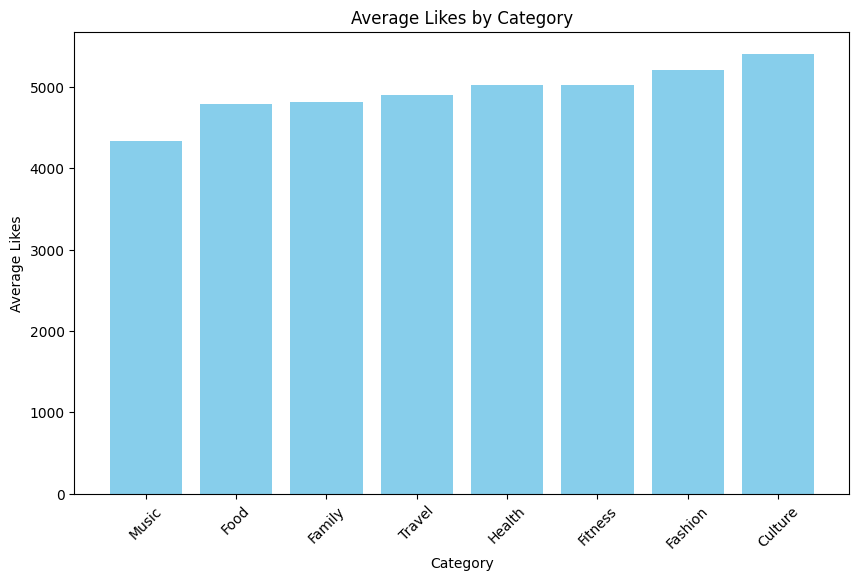


ANOVA Test Result:
F_onewayResult(statistic=0.7316521550155842, pvalue=0.6452095470831561)

Logistic Regression Model Accuracy:
1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [8]:
if __name__ == "__main__":
    main()  # Execute the main function

In summary, this script showcases how to generate random data, visualize data, perform statistical tests, and build a predictive model using a logistic regression algorithm. The functions are organized to perform specific tasks, making the code modular and easy to understand and maintain.